# Анализ продаж видеоигр интернет-магазина "Стримчик" 

# Оглавление
* [Описание проекта](#description
)
* [Цель и задачи исследования](#research_purpose)
* [Исходные данные](#initial_data)
* [Знакомство с данными](#first_look)
* [Предобработка данных](#preprocessing)
    * [Переименование столбцов](#columns_renaming)
    * [Работа с пропусками](#na)
    * [Типы данных](#data_types)
    * [Аномалии](#anomal)
    * [Суммарные продажи во всех регионах](#total_sales)
    * [Выводы по предобработке данных](#conclusion_preprocessing)
* [Исследовательский анализ данных](#research)
    * [Количество игр, выпускавшихся в разные годы](#games_per_year)
    * [Продажи по платформам](#sales_per_platform)
    * [Продажи по жанрам](#sales_per_genre)
* [Портреты пользователей разных регионов](#portraits)
* [Общий вывод](#conclusion)

# Описание проекта <a class='anchor' id='description'></a>
Вы работаете в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Вам нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Перед вами данные до 2016 года. Представим, что сейчас декабрь 2016 г., и вы планируете кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируете ли вы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.

# Цель и задачи работы <a class='anchor' id='research_purpose'></a>

Целью настоящей работы было определение плана действий магазина в следующем году для повышения продаж.

Для достижения цели в работе решались следующие задачи:
* Предобработка данных для устранения пропусков, дубликатов, аномалий и некорректных типов данных.
* Исследовательский анализ.
* Составление портретов пользователей разных регионов.

# Исходные данные <a class='anchor' id='initial_data'></a>
* Name — название игры
* Platform — платформа
* Year_of_Release — год выпуска
* Genre — жанр игры
* NA_sales — продажи в Северной Америке (миллионы проданных копий)
* EU_sales — продажи в Европе (миллионы проданных копий)
* JP_sales — продажи в Японии (миллионы проданных копий)
* Other_sales — продажи в других странах (миллионы проданных копий)
* Critic_Score — оценка критиков (максимум 100)
* User_Score — оценка пользователей (максимум 10)
* Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

## Знакомство с данными <a class='anchor' id='first_look'></a>

**Импортируем необходимые библиотеки**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.graph_objs as go
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as st

**Получим общую информацию о датафрейме**

Создадим экземпляр класса `DataFrame`, куда поместим анализируемую таблицу. Выведем первые 5 строк.

In [2]:
try:
    data = pd.read_csv('games.csv')
except:
    data = pd.read_csv('https://raw.githubusercontent.com/PetrusPrimus-lab/Data_analysis_projects/07b4f01d5f09779b69cbc2ea3112a2762b6ba8b0/Yandex_Practicum_Projects/games_sales_analysis/games.csv')
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


Выведем общую информацию о датафрейме.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Имеем дело с датафреймом, состоящим из 16715 строк и 11 столбцов. 

***Видны следующие проблемы, которые нужно решить:***
* Названия столбцов не в нижнем регистре;
* Пропуски в столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating`;
* Типы данных
    * `Year_of_Release` - `float64`, хотя дробных годов в календаре нормального человека нет. Переведем в `int64`;
    * `User_Score` - `object`, хотя там находятся числовые данные с плавающей точкой. Переведем в `float64`.

Оценим количество явных дубликатов.

In [4]:
data.duplicated().sum()

0

Явных дубликатов нет. Но могут быть и неявные. Посмотрим, есть ли повторы в столбце `Name`.

In [5]:
data['Name'].unique().tolist()

['Wii Sports',
 'Super Mario Bros.',
 'Mario Kart Wii',
 'Wii Sports Resort',
 'Pokemon Red/Pokemon Blue',
 'Tetris',
 'New Super Mario Bros.',
 'Wii Play',
 'New Super Mario Bros. Wii',
 'Duck Hunt',
 'Nintendogs',
 'Mario Kart DS',
 'Pokemon Gold/Pokemon Silver',
 'Wii Fit',
 'Kinect Adventures!',
 'Wii Fit Plus',
 'Grand Theft Auto V',
 'Grand Theft Auto: San Andreas',
 'Super Mario World',
 'Brain Age: Train Your Brain in Minutes a Day',
 'Pokemon Diamond/Pokemon Pearl',
 'Super Mario Land',
 'Super Mario Bros. 3',
 'Grand Theft Auto: Vice City',
 'Pokemon Ruby/Pokemon Sapphire',
 'Brain Age 2: More Training in Minutes a Day',
 'Pokemon Black/Pokemon White',
 'Gran Turismo 3: A-Spec',
 'Call of Duty: Modern Warfare 3',
 'Pokémon Yellow: Special Pikachu Edition',
 'Call of Duty: Black Ops 3',
 'Call of Duty: Black Ops',
 'Pokemon X/Pokemon Y',
 'Call of Duty: Black Ops II',
 'Call of Duty: Modern Warfare 2',
 'Grand Theft Auto III',
 'Super Smash Bros. Brawl',
 'Mario Kart 7',
 'Ani

На первый взгляд повторов нет. Посмотрим количество уникальных названий в этом столбце.

In [6]:
data['Name'].nunique()

11559

Уникальных названий меньше, чем число строк в датафрейме. Это может быть связано с тем, что одна и та же игра есть на разных платформах.

In [7]:
# Отобразим больше строк из исходной таблицы 
data[['Name', 'Platform']].head(30)

,Name,Platform
0,Wii Sports,Wii
1,Super Mario Bros.,NES
2,Mario Kart Wii,Wii
3,Wii Sports Resort,Wii
4,Pokemon Red/Pokemon Blue,GB
5,Tetris,GB
6,New Super Mario Bros.,DS
7,Wii Play,Wii
8,New Super Mario Bros. Wii,Wii
9,Duck Hunt,NES


Действительно, для игры `Grand Theft Auto V` уже видно 2 платформы: `PS3` и `X360`. Проблем с дублирующимися строками с высокой вероятностью быть не должно.

Проверим наличие неявных дубликатов. Таковыми будем считать строки, где в столбцах `name` и `platform` содержатся одинаковые названия

In [8]:
data[data.duplicated(subset=['Name', 'Platform'])] # Выводим дубликаты строк с теми же названиями игр и платформ

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
1591,Need for Speed: Most Wanted,X360,2005.0,Racing,1.0,0.13,0.02,0.10,83.0,8.5,T
4127,Sonic the Hedgehog,PS3,NaN,Platform,0.0,0.48,0.00,0.00,43.0,4.1,E10+
11715,Need for Speed: Most Wanted,PC,2012.0,Racing,0.0,0.06,0.00,0.02,82.0,8.5,T
14244,NaN,GEN,1993.0,NaN,0.0,0.00,0.03,0.00,NaN,NaN,NaN
16230,Madden NFL 13,PS3,2012.0,Sports,0.0,0.01,0.00,0.00,83.0,5.5,E


Видим, что есть 5 таких дубликатов. Это одни и те же игры на тех же платформах, но года выпуска разные, а также продажи отличны. Предположу, что это могут быть обновления старых версий этих игр: новая озвучка, локализация под конкретных пользователей, добавление новых эпизодов и т.п. Избавимся от таких дубликатов. Но, думаю, нужно оставить свежие версии этих игр, т.к. первоначальные - больше не актуальны. Для этого первоначально отсортируем датафрейм по убыванию в столбце с годами выпуска. Затем удалим строки с повторами в столбцах name и platform, оставив только первую запись в каждом случае.
    
    


In [9]:
data = data.sort_values('Year_of_Release', ascending=False) # Сортируем от новых годам к старым

# Удаляем строки-дубликаты с повторяющимися парами Игра-Платформа
data.drop_duplicates(
    subset=['Name', 'Platform'], 
    keep='first', 
    inplace=True
) 

# Проверяем, не осталось ли таких дубликатов
data.duplicated(subset=['Name', 'Platform']).sum()

0

Оценим распределения количественных признаков.

In [10]:
px.histogram(
    data,
    'NA_sales',
    nbins=30,
    title='Распределение продаж в Северной Америке',
    labels={
        'NA_sales': 'Число проданных копий в Северной Америке, млн шт.'
    }
)

In [11]:
px.histogram(
    data,
    'EU_sales',
    nbins=30,
    title='Распределение продаж в Европе',
    labels={
        'EU_sales': 'Число проданных копий в Европе, млн шт.'
    }
)

In [12]:
px.histogram(
    data,
    'JP_sales',
    nbins=30,
    title='Распределение продаж в Японии',
    labels={
        'JP_sales': 'Число проданных копий в Японии, млн шт.'
    }
)

In [13]:
px.histogram(
    data,
    'Critic_Score',
    nbins=30,
    title='Распределение оценок критиков',
    labels={
        'Critic_Score': 'Оценка критика'
    }
)

In [14]:
px.histogram(
    data,
    'Year_of_Release',
    nbins=30,
    title='Распределение годов выпуска игр',
    labels={
        'Year_of_Release': 'Год выпуска игр'
    }
)

Можно сделать следующие промежуточные выводы:
* В основном игры были выпущены в период 2000 - 2015 гг.;
* **Распределения продаж для разных групп потребителей выглядят похоже. Явно, есть аномально высокие значения. Нужно с этим также разобраться далее, в ходе предобработки;**
* Оценки критиков имеют левоскошенное распределение Пуассона. В основном игры получали оценки в диапазоне 50 - 90. 

## Предобработка данных <a class='anchor' id='preprocessing'></a>

### Переименование столбцов <a class='anchor' id='columns_renaming'></a>

Приведем названия всех столбцов к нижнему регистру.

In [15]:
data.columns = data.columns.str.lower() 
data.columns # Проверим названия столбцов еще раз

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Работа с пропусками <a class='anchor' id='na'></a>

***Посмотрим на строки с пропусками в столбцах с названиями игр и жанрами.***

In [16]:
data[data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
14244,NaN,GEN,1993.0,NaN,0.0,0.0,0.03,0.0,NaN,NaN,NaN


Данные пропуски возникли случайно. Все-таки продажи и платформы тут указаны, а также год выпуска. Заполнить эти пропуски самостоятельно не удастся. Нужно обратиться к тому, кто составлял, чтобы узнать, какие именно игры это были. Пропуски всего в 1 строке - это меньше 0.01% от всего датафрейма. Удалим данную строку.

In [17]:
data = data.dropna(subset=['name']) # удаляем строки с пропусками в столбце `names`
data['name'].isna().sum() # проверяем, успешно ли удалили пропуски

0

***Разберемся с пропусками в столбце с годами выпуска***

Посчитаем общее количество пропусков

In [18]:
data['year_of_release'].isna().sum()

268

Выведем эти строки

In [19]:
data[data['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Можно было бы найти год выпуска для этих игр на другой платформе, где возможно. Но это некорректно, т.к. год выпуска игры на конкретной платформе свой. Строк всего 268, что меньше 2% от всего датафрейма. Поэтому удалим данные пропуски.

In [20]:
data.dropna(subset=['year_of_release'], inplace=True) # Удаляем пропуски в столбце с годом выпуска
data['year_of_release'].isna().sum() # Проверяем

0

***Разберемся с пропусками в столбцах с оценками пользователей, критиков и рейтингом***

В этих столбцах до 50% пропусков - внушительное число. Удалять их нельзя. Эти пропуски возникли, скорее всего, случайно. Оставим их.

Пропуски в столбцах с оценками пользователей и критиков могли возникнуть либо случайно, либо из-за того, что оценок для данных игр пока просто нет (могли еще не успеть оценить или в базу данные не успели подтянуться на момент составления отчета)

Пропуски в столбце с рейтингом могли возникнуть неслучайно. ESRB - это американская организация. Возможно, рейтингов нет в основном для игр, не продающихся в Америке. Проверим эту гипотезу.

In [21]:
# Считаем пропуски в столбце с рейтингами
data['rating'].isna().sum()

6676

In [22]:
(
    data[
        (data['rating'].isna()) & (data['na_sales'] == 0)
    ]['rating']
    .isna()
    .sum()
)

3688

Больше половины остутствующих рейтингов характерны для игр, не продающихся в Америке. Значит, есть взаимосвязь с тем, что ESRB - американское агентство.

Пропуски в столбце с рейтингом заполним текстом "unknown", чтобы в дальнейшем не потерять эти строки.

In [23]:
data['rating'].fillna('unknown', inplace=True) # Заполняем пропуски в столбце с рейтингами
data['rating'].isna().sum() # Проверяем, не осталось ли пропусков

0

### Типы данных <a class='anchor' id='data_types'></a>

Преобразуем данные в столбце `year_of_release` к типу `Int64`

In [24]:
data['year_of_release'] = np.floor(pd.to_numeric(data['year_of_release'], errors='coerce')).astype('Int64') 
data['year_of_release'].head(10)

16714    2016
14400    2016
2024     2016
15456    2016
14385    2016
921      2016
15143    2016
13214    2016
16188    2016
11512    2016
Name: year_of_release, dtype: Int64

Разберемся с данными в столбце `user_score`. Пока они в формате `object`. Вероятно, это из-за того, что в некоторых ячейках встречается строка `tbd`. Это означает, что данная информация еще будет добавлена, но пока ее нет. Поэтому заполним такие ячейки пропусками.

In [25]:
data['user_score'] = pd.to_numeric(data['user_score'], errors='coerce')
data.info() #проверяем текущий тип данных в нужном столбце

<class 'pandas.core.frame.DataFrame'>
Index: 16441 entries, 16714 to 1968
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16441 non-null  object 
 1   platform         16441 non-null  object 
 2   year_of_release  16441 non-null  Int64  
 3   genre            16441 non-null  object 
 4   na_sales         16441 non-null  float64
 5   eu_sales         16441 non-null  float64
 6   jp_sales         16441 non-null  float64
 7   other_sales      16441 non-null  float64
 8   critic_score     7980 non-null   float64
 9   user_score       7460 non-null   float64
 10  rating           16441 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


### Аномалии <a class='anchor' id='anomal'></a>

***Посмотрим подробнее распределение продаж в Северной Америке.***

In [26]:
px.histogram(
    data,
    'na_sales',
    nbins=30,
    title='Распределение продаж в Северной Америке',
    labels={
        'na_sales': 'Число проданных копий в Северной Америке, млн шт.'
    }
)

In [27]:
px.box(
    data,
    y='na_sales',
    title='Диаграмма размаха для количества млн проданных копий в Северной Америке'
)

В столбце с продажами в Северной Америке имеется значительное количество выбросов - значений, превышающих 3 квартиль + 1.5 межквартильных размаха. Такие продажи, безусловно, могли быть для очень популярных игр. Но основная масса продаж находится в интервале до 240 тыс. проданных копий. Уберем значения выше 240 тыс. копий.

In [28]:
data = data[(data['na_sales'] < 0.24) | (data['na_sales'].isna())]
px.histogram(
    data,
    'na_sales',
    nbins=30,
    title='Распределение продаж в Северной Америке',
    labels={
        'na_sales': 'Число проданных копий в Северной Америке, млн шт.'
    }
)

Есть также явный выброс - продажи около 0. Но таких строк 5000. Потеряем слишком много данных, если удалим. Возможно, причина - низкий рейтинг этих игр.

In [29]:
# Вычислим медианный рейтинг игр с нулевыми продажами в Северной Америке
data[data['na_sales'] == 0]['user_score'].median()

7.6

Рейтинг достаточно высок. Значит, дело в другом. Посмотрим на эти строки.

In [30]:
data[data['na_sales'] == 0]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16714,Winning Post 8 2016,PSV,2016,Simulation,0.0,0.00,0.01,0.00,NaN,NaN,unknown
14400,DiRT Rally,PC,2016,Racing,0.0,0.03,0.00,0.00,86.0,8.7,E
14385,Tokyo Xanadu eX+,PS4,2016,Role-Playing,0.0,0.00,0.03,0.00,NaN,NaN,unknown
15143,Toukiden 2,PS3,2016,Action,0.0,0.00,0.02,0.00,NaN,NaN,unknown
11512,Pro Cycling Manager 2016,PS4,2016,Sports,0.0,0.07,0.00,0.01,NaN,NaN,unknown
...,...,...,...,...,...,...,...,...,...,...,...
15957,Strongest Tokyo University Shogi DS,DS,1985,Action,0.0,0.00,0.02,0.00,NaN,NaN,unknown
1855,Lode Runner,NES,1984,Puzzle,0.0,0.00,1.10,0.00,NaN,NaN,unknown
2950,Mappy,NES,1984,Platform,0.0,0.00,0.69,0.00,NaN,NaN,unknown
1234,F1 Race,NES,1984,Racing,0.0,0.00,1.52,0.00,NaN,NaN,unknown


Вот и ответ. Продажи этих игр просто не открывались в Северной Америке, ровно как и в Европе. Целевой аудиторией были японцы. Оставим эти строки. Но в дальнейшем при составлении портретов пользователей разных регионов будем анализировать отдельные датафреймы с ненулевыми продажами для соответствующего региона.

***Посмотрим подробнее распределение продаж в Европе.***

In [31]:
px.histogram(
    data,
    'eu_sales',
    nbins=30,
    title='Распределение продаж в Европе',
    labels={
        'eu_sales': 'Число проданных копий в Европе, млн шт.'
    }
)

В столбце с продажами в Европе имеется значительное количество выбросов - значений, превышающих 3 квартиль + 1.5 межквартильных размаха. Такие продажи, безусловно, могли быть для очень популярных игр. Но основная масса продаж находится в интервале до 200 тыс. проданных копий. Уберем значения выше 200 тыс. копий.

In [32]:
data = data[(data['eu_sales'] < 0.2) | (data['eu_sales'].isna())]
fig1 = px.histogram(
    data,
    'eu_sales',
    nbins=30,
    title='Распределение продаж в Европе',
    labels={
        'eu_sales': 'Число проданных копий в Европе, млн шт.'
    }
)
fig1.show()
fig2 = px.box(
    data,
    y='eu_sales',
    title='Диаграмма размаха для количества млн проданных копий в Европе'
)
fig2.show()

***Посмотрим подробнее распределение продаж в Японии.***

In [33]:
px.histogram(
    data,
    'jp_sales',
    nbins=30,
    title='Распределение продаж в Японии',
    labels={
        'jp_sales': 'Число проданных копий в Японии, млн шт.'
    }
)

В столбце с продажами в Японии имеется значительное количество выбросов - значений, превышающих 3 квартиль + 1.5 межквартильных размаха. Такие продажи, безусловно, могли быть для очень популярных игр. Но основная масса продаж находится в интервале до 100 тыс. проданных копий. Уберем значения выше 100 тыс. копий.

In [34]:
data = data[(data['jp_sales'] < 0.1) | (data['jp_sales'].isna())]
fig1 = px.histogram(
    data,
    'jp_sales',
    nbins=30,
    title='Распределение продаж в Японии',
    labels={
        'jp_sales': 'Число проданных копий в Японии, млн шт.'
    }
)
fig1.show()
fig2 = px.box(
    data,
    y='jp_sales',
    title='Диаграмма размаха для количества млн проданных копий в Японии'
)
fig2.show()

### Суммарные продажи во всех регионах <a class='anchor' id='total_sales'></a>

Добавим столбец с суммарными продажами во всех регионах.

In [35]:
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
14400,DiRT Rally,PC,2016,Racing,0.00,0.03,0.00,0.00,86.0,8.7,E,0.03
15456,Carmageddon: Max Damage,XOne,2016,Action,0.01,0.01,0.00,0.00,52.0,7.1,M,0.02
14385,Tokyo Xanadu eX+,PS4,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
15143,Toukiden 2,PS3,2016,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
13214,Metroid Prime: Federation Force,3DS,2016,Action,0.02,0.01,0.01,0.00,64.0,5.1,T,0.04
16188,Darksiders: Warmastered Edition,XOne,2016,Action,0.01,0.00,0.00,0.00,80.0,7.9,M,0.01
11512,Pro Cycling Manager 2016,PS4,2016,Sports,0.00,0.07,0.00,0.01,NaN,NaN,unknown,0.08
13224,Ghostbusters (2016),XOne,2016,Action,0.04,0.00,0.00,0.01,NaN,NaN,unknown,0.05
13227,Hatsune Miku: Project Diva X,PS4,2016,Misc,0.02,0.00,0.02,0.00,78.0,7.4,T,0.04


### Вывод по предобработке данных <a class='anchor' id='conclusion_preprocessing'></a>

На этапе предобработки сделано следующее: 
* Названия всех столбцов для удобства были приведены к нижнему регистру. 
* Выявлены неявные дубликаты: название игры - платформа. Сделано предположение, что это могут быть обновления старых версий этих игр: новая озвучка, локализация под конкретных пользователей, добавление новых эпизодов и т.п. Избавились от таких дубликатов, оставив только свежие версии этих игр, т.к. первоначальные - больше не актуальны. 
* Выявлены пропуски в столбцах с названиями видеоигр, жанром, годом выпуска, оценками и рейтингом. 
    * Строк с пропусками названий видеоигр и жанром всего 1, поэтому их просто удалили.
    * Строк, где пропущен год выпуска, меньше 2% от всего датафрейма. Поэтому удалили данные пропуски.
    * Пропуски в столбцах с оценками пользователей и критиков могли возникнуть либо случайно, либо из-за того, что оценок для данных игр пока просто нет (могли еще не успеть оценить или в базу данные не успели подтянуться на момент составления отчета). Данных пропусков оказалось до 50% от всего датафрейма, поэтому их оставили.
    * Пропуски в столбце с рейтингом возникли неслучайно. ESRB - это американская организация. Рейтингов нет в основном для игр, не продающихся в Америке. Данные пропуски заполнены словом "unknown", чтобы не потерять при дальнейшем анализе. 
* Данные в столбце с годами выпуска приведены к целочисленному типу, а данные в столбце с оценками пользователей - к типу `float64`. Аббревиатура `tbd` также была заменена пропуском. 
* Утсранены аномально высокие продажи по отдельным регионам. Во всех случаях остались продажи до 100 - 250 тыс. копий.
* Добавлен столбец с суммарными продажами по всем регионам. Его мы будем использовать в исследовательском анализе данных.

## Исследовательский анализ данных <a class='anchor' id='research'></a>

### Количество игр, выпускавшихся в разные годы <a class='anchor' id='games_per_year'></a>

Посмотрим на распределение количества игр, выпускавшихся в разные годы.

Предварительно уберем дубли игра - год выпуска, оставив только первое упоминание. Это необходимо, чтобы убрать те случаи, когда одна и та же игра выпускалась в один год на разных платформах.

In [36]:
data_games_per_year = (
    data
    .drop_duplicates(subset=['name', 'year_of_release'], keep='first')
    .groupby('year_of_release')['name']
    .count()
    .reset_index()
)
data_games_per_year.columns = ['Год выпуска', 'Количество игр']
px.bar(
    data_games_per_year,
    y='Количество игр',
    x='Год выпуска',
    title='Распределение количества выпущенных игр по годам'
)

Видно, что наибольшее количество игр выпускали в 2009 г. Активно игры начали выпускать, начиная с 2000 г., поэтому можно анализировать данные после этого года.

In [37]:
data_after_2000 = data[data['year_of_release'] >= 2000]
data_after_2000_grouped = (
    data_after_2000
    .drop_duplicates(subset=['name', 'year_of_release'], keep='first')
    .groupby('year_of_release')['name']
    .count()
    .reset_index()
)
data_after_2000_grouped.columns = ['Год выпуска', 'Количество игр']
px.bar(
    data_after_2000_grouped,
    x='Год выпуска',
    y='Количество игр',
    title='Распределение количества выпущенных игр по годам'
)

До 2008-2009 гг. игровая индустрия активно развивалась, появлялось все больше рабочих мест. Спрос на игры также рос, исходя из диаграммы. 2008-2009 гг. - время международного финансового кризиса. Тем не менее, количество проданных игр достигло пика именно в этот период. Видимо, одним из немногоих утешений для людей в те годы были видеоигры. Это помогало уйти от реальности. После кризиса продажи откатились и даже стали ниже с 2012 г., по сравнению с докризисными временами. Очевидно, игровой бум начал уходить.

### Продажи по платформам <a class='anchor' id='sales_per_platform'></a>

Посмотрим на распределение суммарных продаж игр в зависимости от платформы.

In [38]:
data_after_2000_platforms = (
    data_after_2000
    .groupby('platform')['total_sales']
    .sum()
    .reset_index()
)
data_after_2000_platforms.columns = ['Платформа', 'Суммарные продажи']
px.bar(
    data_after_2000_platforms,
    x='Платформа',
    y='Суммарные продажи',
    title='Распределение суммарных продаж игр по платформам'
)

Видно, что наибольшие суммарные продажи характерны для следующих платформ: PS2, DS, Wii и X360.

Подтвердим этот топ-4, написав автоматизированный поиск топ-4 платформ по суммарным продажам.

In [39]:
top_sum_total_sales = (
    data_after_2000
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
top_sum_total_sales.index[:4].tolist()

['PS2', 'DS', 'X360', 'Wii']

Посмотрим для них распределение суммарных продаж по годам.

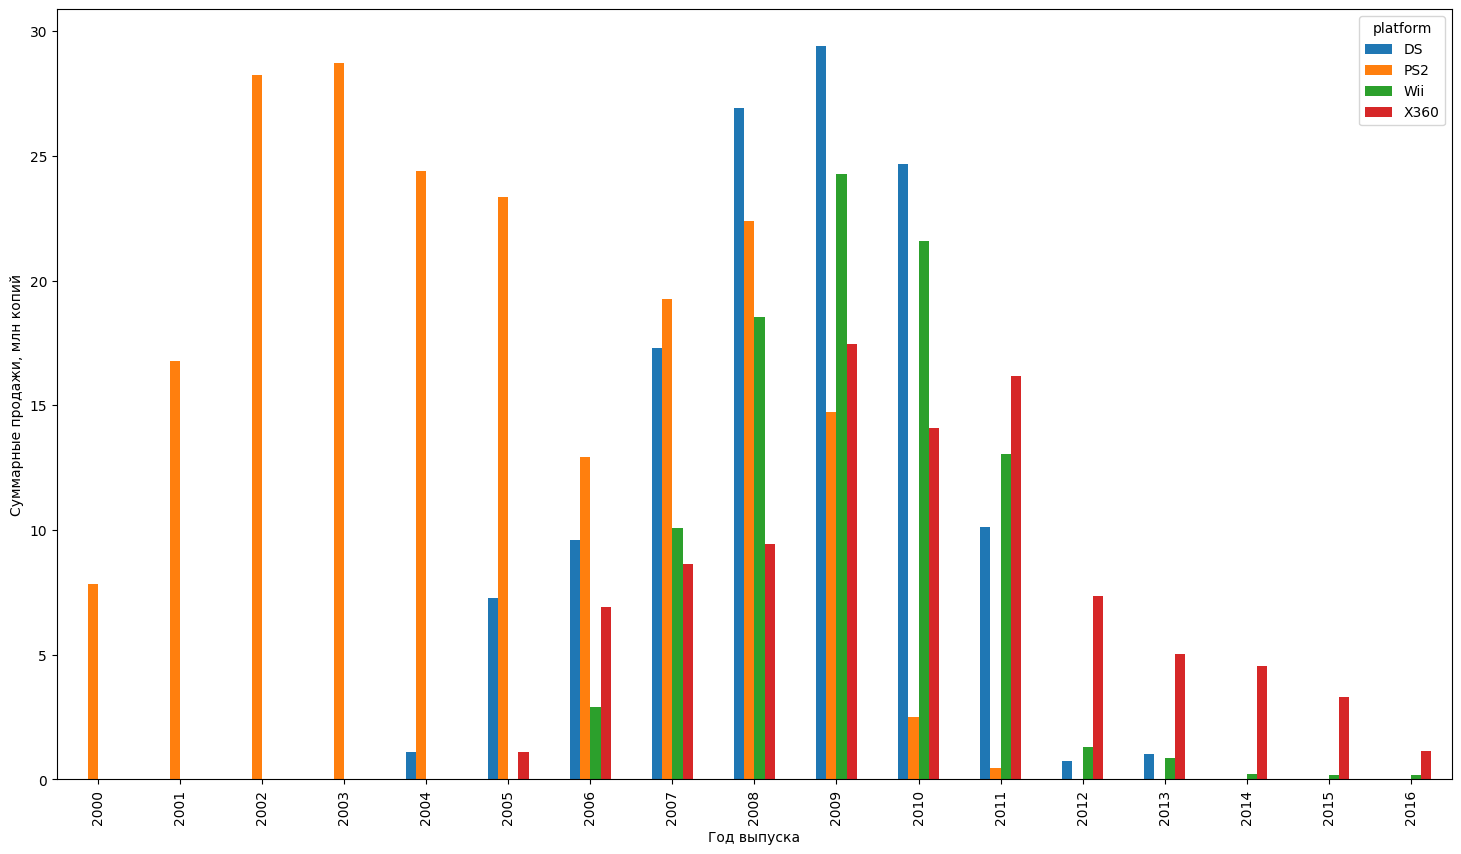

In [40]:
(
    data_after_2000[data_after_2000['platform'].isin(['X360', 'PS2', 'Wii', 'DS'])]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', xlabel='Год выпуска', ylabel='Суммарные продажи, млн копий', figsize=(18, 10))
);

Видим, что для анализируемых платформ суммарные продажи проходят через максимумы: один год либо период в несколько лет. Время выхода на максимальные продажи занимает 4-6 лет. **Характерное время существования платформ составило 10-12 лет**. 

На примере PS проследим сменяемость поколений одной платформы.

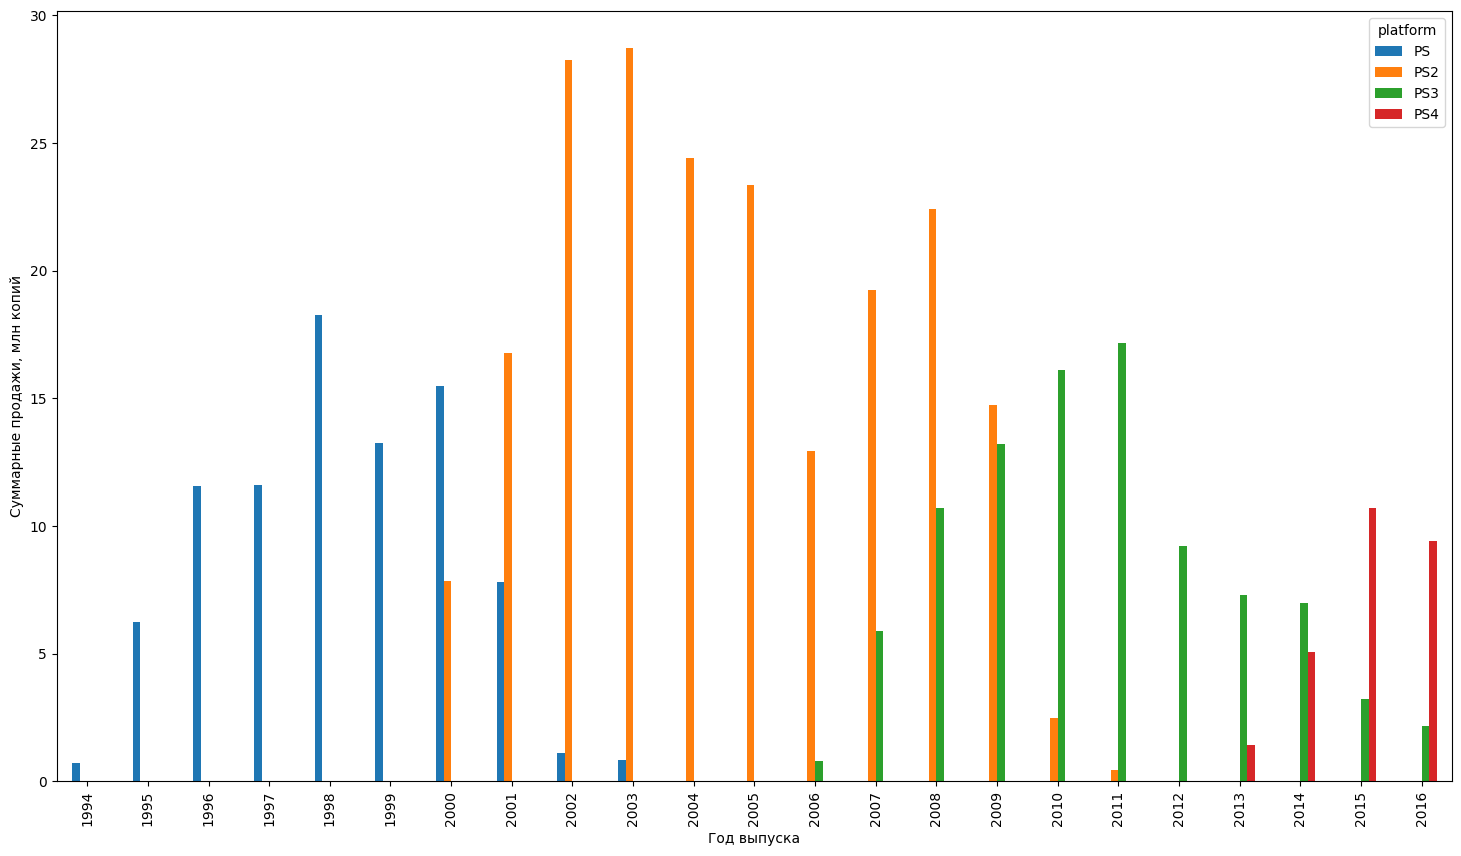

In [41]:
(
    data[data['platform'].isin(['PS', 'PS2', 'PS3', 'PS4'])]
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')
    .plot(kind='bar', xlabel='Год выпуска', ylabel='Суммарные продажи, млн копий', figsize=(18, 10))
);

**Видно, что следующее поколение платформы выходит через 7-8 лет после выпуска предыдущего.**

Для других платформ продажи в 21 веке могут быть меньше из-за того, что они являются более молодыми. Для лидеров по суммарным продажам, как мы увидели, характерно прохождение полного цикла жизни платформы в 10-12 лет, поэтому все продажи игр на этих платформах уже состоялись. Причем максимум продаж приходился на 2008-2009 гг., что коррелирует с распределением количества выпущенных игр в эти годы. Дальнейшая просадка по количеству выпускаемых игр связана со сменой поколений платформ. **Для дальнейшего анализа возьмем актуальный новый цикл: 2012+.**

In [42]:
data_after_2012 = data[data['year_of_release'] >= 2012]
data_after_2012.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16714,Winning Post 8 2016,PSV,2016,Simulation,0.00,0.00,0.01,0.00,NaN,NaN,unknown,0.01
14400,DiRT Rally,PC,2016,Racing,0.00,0.03,0.00,0.00,86.0,8.7,E,0.03
15456,Carmageddon: Max Damage,XOne,2016,Action,0.01,0.01,0.00,0.00,52.0,7.1,M,0.02
14385,Tokyo Xanadu eX+,PS4,2016,Role-Playing,0.00,0.00,0.03,0.00,NaN,NaN,unknown,0.03
15143,Toukiden 2,PS3,2016,Action,0.00,0.00,0.02,0.00,NaN,NaN,unknown,0.02
13214,Metroid Prime: Federation Force,3DS,2016,Action,0.02,0.01,0.01,0.00,64.0,5.1,T,0.04
16188,Darksiders: Warmastered Edition,XOne,2016,Action,0.01,0.00,0.00,0.00,80.0,7.9,M,0.01
11512,Pro Cycling Manager 2016,PS4,2016,Sports,0.00,0.07,0.00,0.01,NaN,NaN,unknown,0.08
13224,Ghostbusters (2016),XOne,2016,Action,0.04,0.00,0.00,0.01,NaN,NaN,unknown,0.05
13227,Hatsune Miku: Project Diva X,PS4,2016,Misc,0.02,0.00,0.02,0.00,78.0,7.4,T,0.04


Рассмотрим динамику продаж для всех платформ в выбранном периоде.

In [43]:
px.bar(
    data_after_2012
    .pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum'),
    title='Динамика продаж игр в разбивке по платформам с 2012 по 2016 гг.'
)

Положительную динамику суммарных продаж показывают следующие платформы:
* `PS4`, `XOne`

Обе эти платформы существуют 4 года, значит, потенциально в следующем году могут показать суммарные продажи, близкие к максимальным.

Также стоит обратить внимание на `PC`, растущий с 2014 по 2016 гг.

Построим диаграмму размаха для глобальных продаж в разбивке по платформам `PS4`, `XOne` и `PC`.

In [44]:
(
    px.box(
        data_after_2012[data_after_2012['platform'].isin(["XOne", "PS4", "PC"])],
        x='platform',
        y='total_sales',
        title='Диаграмма размаха глобальных продаж для 3 популярных платформ'
    )
)

Есть следующие гипотезы:
* Глобальные продажи игр на платформе `XOne` больше, чем на `PS4` и `PC`
* Глобальные продажи игр на платформах `PS4` и `PC` одинаковы 

Проверим эти гипотезы:

In [45]:
# Проверяем, больше ли глобальные продажи игр на платформе XOne, по сравнению с PS4 
# H0: глобальные продажи игр на платформе XOne не больше, чем на PS4
# H1: глобальные продажи игр на платформе XOne больше, чем на PS4 
alpha = .05
res_xone_ps4 = st.ttest_ind(
    data_after_2012[data_after_2012['platform'] == 'XOne']['total_sales'], 
    data_after_2012[data_after_2012['platform'] == 'PS4']['total_sales'], 
    alternative='greater'
)
if res_xone_ps4.pvalue < alpha:
    print(f'''Глобальные продажи игр на платформе XOne больше, 
    чем на PS4, при уровне значимости 0.05, т.к. p-value = {res_xone_ps4.pvalue}''')
else:
    print(f'''Глобальные продажи игр на платформе XOne не больше, 
          чем на PS4, при уровне значимости 0.05, т.к. p-value = {res_xone_ps4.pvalue}''')

# Проверяем, больше ли глобальные продажи игр на платформе XOne, по сравнению с PC 
# H0: глобальные продажи игр на платформе XOne не больше, чем на PC
# H1: глобальные продажи игр на платформе XOne больше, чем на PC 
res_xone_pc = st.ttest_ind(
    data_after_2012[data_after_2012['platform'] == 'XOne']['total_sales'], 
    data_after_2012[data['platform'] == 'PC']['total_sales'], 
    alternative='greater'
)
if res_xone_pc.pvalue < alpha:
    print(f'''Глобальные продажи игр на платформе XOne больше, 
          чем на PC, при уровне значимости 0.05, т.к. p-value = {res_xone_pc.pvalue}''')
else:
    print(f'''Глобальные продажи игр на платформе XOne не больше, 
          чем на PC, при уровне значимости 0.05, т.к. p-value = {res_xone_pc.pvalue}''')
    
# Проверяем, равны ли глобальные продажи игр на платформах PS4 и PC 
# H0: глобальные продажи игр на платформах PS4 и PC одинаковы
# H1: глобальные продажи игр на платформах PS4 и PC различны 
res_ps4_pc = st.ttest_ind(
    data_after_2012[data_after_2012['platform'] == 'PS4']['total_sales'], 
    data_after_2012[data_after_2012['platform'] == 'PC']['total_sales'], 
    alternative='two-sided'
)
if res_ps4_pc.pvalue < alpha:
    print(f'''Глобальные продажи игр на платформах PS4 и PC различны 
          при уровне значимости 0.05, т.к. p-value = {res_ps4_pc.pvalue}''')
else:
    print(f'''Глобальные продажи игр на платформах PS4 и PC одинаковы 
          при уровне значимости 0.05, т.к. p-value = {res_ps4_pc.pvalue}''')
    
if res_ps4_pc.pvalue < alpha:
    res_ps4_pc = st.ttest_ind(
    data_after_2012[data_after_2012['platform'] == 'PS4']['total_sales'], 
    data_after_2012[data_after_2012['platform'] == 'PC']['total_sales'], 
    alternative='greater'
    )
    if res_ps4_pc.pvalue < alpha:
        print(f'''Глобальные продажи игр на платформе PS4 больше, 
              чем на PC при уровне значимости 0.05, т.к. p-value = {res_ps4_pc.pvalue}''')
    else:
        print(f'''Глобальные продажи игр на платформе PS4 меньше, 
              чем на PC при уровне значимости 0.05, т.к. p-value = {res_ps4_pc.pvalue}''') 
    

Глобальные продажи игр на платформе XOne не больше, 
          чем на PS4, при уровне значимости 0.05, т.к. p-value = 0.3577197172148105
Глобальные продажи игр на платформе XOne больше, 
          чем на PC, при уровне значимости 0.05, т.к. p-value = 0.0004165397681708792
Глобальные продажи игр на платформах PS4 и PC различны 
          при уровне значимости 0.05, т.к. p-value = 0.0015412759040485443
Глобальные продажи игр на платформе PS4 больше, 
              чем на PC при уровне значимости 0.05, т.к. p-value = 0.0007706379520242721


Итак, после проведения t-теста получили следующие результаты:
* Глобальные продажи игр на платформе XOne больше, чем на PS4 и PC
* Глобальные продажи игр на платформе PS4 больше, чем на PC 

**Рассмотрим, как в рамках платформы `XOne`, отзывы пользователей и критиков влияют на продажи.**

Построим корреляционную матрицу

In [46]:
(
    data_after_2012[data_after_2012['platform'] == 'XOne'][['total_sales', 'critic_score', 'user_score']]
    .corr()
)

,total_sales,critic_score,user_score
total_sales,1.000000,0.210794,-0.039463
critic_score,0.210794,1.000000,0.620501
user_score,-0.039463,0.620501,1.000000


Построим диаграммы рассеяния

In [47]:
px.scatter_matrix(
    data_after_2012[data_after_2012['platform'] == 'XOne'][['total_sales', 'critic_score', 'user_score']],
    title='Матрица диаграмм рассеяния для глобальных продаж, оценки критиков и оценки пользователей'
)

Оценки критиков демонстрируют прямую, средне-слабую корреляцию с значениями глобальных продаж. Оценки пользователей корреляции с глобальными продажами не имеют

### Продажи по жанрам <a class='anchor' id='sales_per_genre'></a>

Посмотрим на распределение продаж игр по жанрам

In [48]:
px.box(
    data_after_2012,
    x='genre',
    y='total_sales',
    title='Диаграммы размаха для глобальных продаж игр в зависимости от жанра'
)

Можно сделать следующие промежуточные выводы:
* Наиболее прибыльными являются игры в жанре `shooter`
* На 2 месте по прибыльности - игры в жанре `platform`
* Наименее прибыльны игры в жанрах `puzzle` и `adventure`

## Портреты пользователей разных регионов <a class='anchor' id='portraits'></a>

Разделим общую таблицу на 3 подтаблицы, соответствующих определенному региону пользователей: Северная Америка, Европа и Япония. Правило, по которому будем делить: ненулевые продажи игр в данном регионе и нулевые продажи игр в оставшихся двух регионах.

In [49]:
data_na = (
    data_after_2012
    .query('na_sales != 0 and eu_sales == 0 and jp_sales == 0 and other_sales == 0')
    .drop(['eu_sales', 'jp_sales', 'other_sales'], axis=1)
)
data_eu = (
    data_after_2012
    .query('eu_sales != 0 and na_sales == 0 and jp_sales == 0 and other_sales == 0')
    .drop(['na_sales', 'jp_sales', 'other_sales'], axis=1)
)
data_jp = (
    data_after_2012
    .query('jp_sales != 0 and eu_sales == 0 and na_sales == 0 and other_sales == 0')
    .drop(['eu_sales', 'na_sales', 'other_sales'], axis=1)
)

Посмотрим на диаграммы размаха продаж в зависимости от платформы для каждого региона 

In [50]:
# Строим диаграммы размаха продаж игр в Северной Америке в зависимости от платформы 
fig_1 = px.box(
    data_na,
    x='platform',
    y='na_sales',
    title='Диаграммы размаха продаж игр в Северной Америке в зависимости от платформы'
)
fig_1.show()

# Строим диаграммы размаха продаж игр в Европе в зависимости от платформы
fig_2 = px.box(
    data_eu,
    x='platform',
    y='eu_sales',
    title='Диаграммы размаха продаж игр в Европе в зависимости от платформы'
)
fig_2.show()

# Строим диаграммы размаха продаж игр в Японии в зависимости от платформы
fig_3 = px.box(
    data_jp,
    x='platform',
    y='jp_sales',
    title='Диаграммы размаха продаж игр в Японии в зависимости от платформы'
)
fig_3.show()

Для Северной Америки наибольшей популярностью пользуются платформы DS и 3DS, тогда как в Европе нет явных фаворитов: PC, 3DS, X360, WiiU, PS4 и DS показывают одинаковые медианные продажи. В Японии есть явный фаворит - платформа Wii, на 2 месте - 3DS, а платформы PSV, PSP и PS4 пользуются одинаковой популярностью. 

Посмотрим на диаграммы размаха продаж в зависимости от жанра для каждого региона

In [51]:
# Строим диаграммы размаха продаж игр в Северной Америке в зависимости от жанра 
fig_1 = px.box(
    data_na,
    x='genre',
    y='na_sales',
    title='Диаграммы размаха продаж игр в Северной Америке в зависимости от жанра'
)
fig_1.show()

# Строим диаграммы размаха продаж игр в Европе в зависимости от жанра
fig_2 = px.box(
    data_eu,
    x='genre',
    y='eu_sales',
    title='Диаграммы размаха продаж игр в Европе в зависимости от жанра'
)
fig_2.show()

# Строим диаграммы размаха продаж игр в Японии в зависимости от жанра
fig_3 = px.box(
    data_jp,
    x='genre',
    y='jp_sales',
    title='Диаграммы размаха продаж игр в Японии в зависимости от жанра'
)
fig_3.show()

Для Северной Америки наибольшей популярностью пользуются жанры Fighting и Racing, в то время как в Европе это Shooter и Fighting. Японцы больше предпочитают Shooter, Sports и Racing. У этих 3 множеств есть пересечения: Fighting, Shooter и Racing. Данные жанры стоит активно продвигать, т.к. у каждого из них есть по 2 целевых региона 

Посмотрим на диаграммы размаха продаж в зависимости от рейтинга ESRB

In [52]:
# Строим диаграммы размаха продаж игр в Северной Америке в зависимости от рейтинга ESRB 
fig_1 = px.box(
    data_na,
    x='rating',
    y='na_sales',
    title='Диаграммы размаха продаж игр в Северной Америке в зависимости от рейтинга ESRB'
)
fig_1.show()

# Строим диаграммы размаха продаж игр в Европе в зависимости от рейтинга ESRB
fig_2 = px.box(
    data_eu,
    x='rating',
    y='eu_sales',
    title='Диаграммы размаха продаж игр в Европе в зависимости от рейтинга ESRB'
)
fig_2.show()

# Строим диаграммы размаха продаж игр в Японии в зависимости от рейтинга ESRB
fig_3 = px.box(
    data_jp,
    x='rating',
    y='jp_sales',
    title='Диаграммы размаха продаж игр в Японии в зависимости от рейтинга ESRB'
)
fig_3.show()

Для Северной Америки наибольшей популярностью пользуются игры с рейтингами E10+, E и без рейтинга ESRB. В Европе наиболее популярны игры с рейтингом M, тогда как игры с другими рейтингами пользуются одинаковой популярностью. В Японии популярны игры с рейтингом T, а E10+ и M делят 2 место.

## Общий вывод <a class='anchor' id='conclusion'></a>

В настоящей работе проанализированы продажи видеоигр как глобально, так и с разбивкой по отдельным регионам.

Для успешной работы в 2017 г. магазину нужно учесть следующие тренды:
* Среди игровых платформ глобально положительную динамику в период с 2012 по 2016 гг. показывают XOne, PS4 и PC. Для отдельных регионов выявлены следующие тренды:
    * Для Северной Америки наибольшей популярностью пользуются платформы DS и 3DS 
    * В Европе нет явных фаворитов: PC, 3DS, X360, WiiU, PS4 и DS показывают одинаковые медианные продажи 
    * В Японии есть явный фаворит - платформа Wii, на 2 месте - 3DS, а платформы PSV, PSP и PS4 пользуются одинаковой популярностью

**=> Стоит сконцентрироваться на платформах DS, 3DS и Wii**


* Если смотреть глобально, то популярностью пользуются игры в жанре Shooter и Platform. Наименее прибыльны игры в жанрах Puzzle и Adventure. В то же время для отдельных регионов стоит предлагать различные игры:
    * Для Северной Америки наибольшей популярностью пользуются жанры Fighting и Racing 
    * В Европе популярны Shooter и Fighting 
    * Японцы больше предпочитают Shooter, Sports и Racing. 

У этих 3 множеств есть пересечения: Fighting, Shooter и Racing. Данные жанры стоит активно продвигать, т.к. у каждого из них есть по 2 целевых региона.

**=> стоит наращивать продажи игр в жанрах Fighting, Shooter и Racing**


* Для Северной Америки наибольшей популярностью пользуются игры с рейтингами E10+, E и без рейтинга ESRB. В Европе наиболее популярны игры с рейтингом M, тогда как игры с другими рейтингами пользуются одинаковой популярностью. В Японии популярны игры с рейтингом T, а E10+ и M делят 2 место.

**=> пользователям из Северной Америки стоит предлагать игры E10+ и E, европейцам - M, японцам - T**

**=>Не нужно обращать внимание на отзывы пользователей и критиков**
